# CLASSIFICATION

IN THIS CLASSIFICATION, THERE ARE 3 MODEL THAT USING FOR THE CLASSIFICATION.

*  THE FIRST MODEL IS USING NAIVE BAYES CLASSIFIER
*  THE SECOND MODEL IS USING DECISION TREE CLASSIFIER
*  THE THIRD MODEL IS USING K-NEAREST NEIGHBOR CLASSIFIER
*  THE PREPROCESSING DATA THAT IS USE IN EVERY MODEL IS SAME, THE DIFFERENCE ONLY BETWEEN THE CLASSIFIER

THE AIM FOR THIS PROJECT IS TO DEFINE THE DIFFERENCE ACCURACY BETWEEN THE MODELS



In [0]:
import pandas as pd
import numpy as np
import collections

#import the classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#import train_test_split to split the data
from sklearn.model_selection import train_test_split

# Import module to standardize the scale(normalization)
import pandas as pd
import numpy as np

# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [0]:
from google.colab import files
uploaded = files.upload()

Saving used_cars.csv to used_cars.csv


**read dataset**

In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['used_cars.csv']))

In [0]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [0]:
df.isnull().sum()

In [0]:
df['transmission'].value_counts()

automatic    17518
manual        1710
other          583
Name: transmission, dtype: int64

# Visualize the **Outlier** that occur on the every features

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


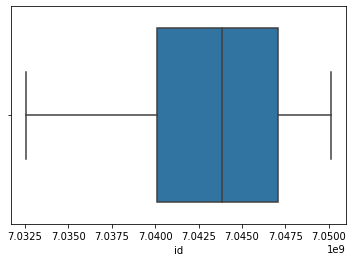

In [0]:
#import the library for boxplot
import seaborn as sns
sns.boxplot(x=df['id'])

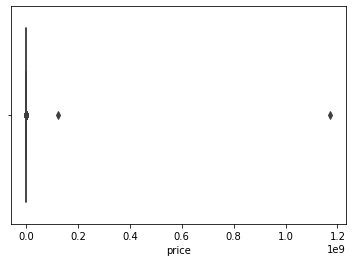

In [0]:
sns.boxplot(x=df['price'])

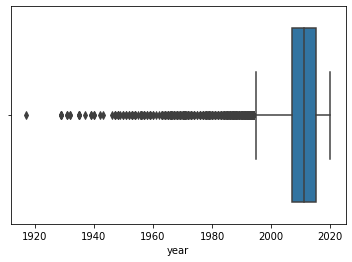

In [0]:
sns.boxplot(x=df['year'])

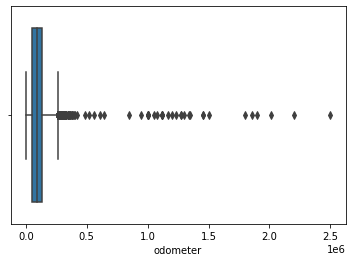

In [0]:
sns.boxplot(x=df['odometer'])

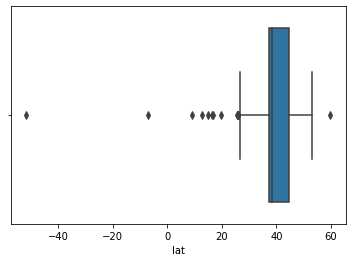

In [0]:
sns.boxplot(x=df['lat'])

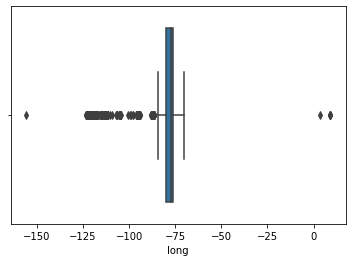

In [0]:
sns.boxplot(x=df['long'])

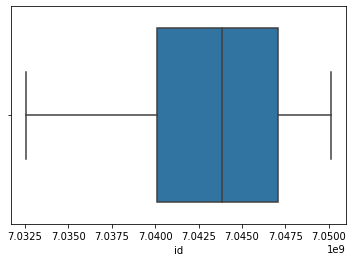

In [0]:
sns.boxplot(x=df['id'])

# **Data Preprocessing**

(its important to know the features and label that we are going to use for the classification, so we can do the data preprocessing more effectively)

IN THIS PHASE OF DATA PREPROCESSING, WE DO SEVERAL STEPS WHICH IS

- DROP THE COLUMNS
- VALUE IMPUTAIION FOR MISSING VALUE
- FEATURES ENCODING
- MINMAX NORMALIZATION


1. **DROP UNECESSARY COLUMNS**  that we are not going to use for the classification


In [0]:
#drop some columns
# sometimes it will be error when we drop the columns, to avoid this situation please re-read the datasets
df = df.drop(columns=['Unnamed: 0','region_url', 'image_url', 'lat', 'long','drive', 'county','url','price','cylinders','title_status','vin','paint_color', 'description','state','region','size','condition','type'])

In [0]:
#the columns already dropped
df

,id,year,manufacturer,model,fuel,odometer,transmission
0,7034441763,2012.0,volkswagen,golf r,gas,63500.0,manual
1,7034440610,2016.0,ford,f-150,gas,10.0,automatic
2,7034440588,2015.0,gmc,sierra 1500,gas,7554.0,automatic
3,7034440546,2016.0,ford,f-150,gas,10.0,automatic
4,7034406932,2018.0,ford,f-450,diesel,70150.0,automatic
...,...,...,...,...,...,...,...
19996,7049052853,2016.0,ram,cummin 2500 laramie,diesel,43406.0,automatic
19997,7049052797,2018.0,nissan,sentra,gas,32867.0,automatic
19998,7049049369,2019.0,jeep,grand cherokee limited,gas,17514.0,automatic
19999,7049042761,2017.0,toyota,corolla,gas,30486.0,automatic


2.  **Data Imputation** to Missing value

in this phase, this model going to fill the features that has the missing value

In [0]:
#we sum the missing value that occurs
df.isnull().sum()

id                 0
year              12
manufacturer     705
model            265
fuel              73
odometer        2389
transmission     190
dtype: int64

In [0]:
#groups the data based on numerical or categorical forms to make it easier when we trying to fill the missing value
numerical = ['id','year','odometer']
categorical = ['manufacturer','model',
               'fuel','transmission']

In [0]:
#fill the data with the mean (for numerical data) and mode/modus (for the categorical data) 
for num in numerical:
    df[num] = df[num].fillna(df[num].mean())

for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

In [0]:
#viola! now all the missing value on the features is fullfil
df.isnull().sum()

id              0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
transmission    0
dtype: int64

3. **Encode the Data** using LabelEncoder()

in this phase we encode the categorical data into numerical, we do this because we need the numerical form of data for the classification!

In [0]:
#import the library for encode the data, this model is using LabelEncoder to encode the data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#begin to encode it
manufac         = le.fit_transform(df['manufacturer'])
model           = le.fit_transform(df['model'])
fuel            = le.fit_transform(df['fuel'])
transmission    = le.fit_transform(df['transmission'])

df['manufacturer'] = manufac
df['model'] = model
df['fuel'] = fuel
df['transmission'] = transmission


In [0]:
df.head()

,id,year,manufacturer,model,fuel,odometer,transmission
0,7034441763,2012.0,38,2197,2,63500.0,1
1,7034440610,2016.0,12,1764,2,10.0,0
2,7034440588,2015.0,13,3285,2,7554.0,0
3,7034440546,2016.0,12,1764,2,10.0,0
4,7034406932,2018.0,12,1843,0,70150.0,0


In [0]:
#prepare the features that use for clasification (training data)
features = [
    'id',
    'year',
    'manufacturer',
    'model',
    'fuel',
    'odometer'
]

 4. **Min Max Normalization**

we do the MinMax normalization for the fatures that we are going to use as the training dataset

In [0]:
from sklearn.preprocessing import MinMaxScaler
feat_scale = MinMaxScaler().fit_transform(df[features])
scaleddata = pd.DataFrame(data = feat_scale , columns=[ 'id','year','manufacturer','model','fuel','odometer'])
scaleddata

,id,year,manufacturer,model,fuel,odometer
0,0.105370,0.922330,0.974359,0.530292,0.5,0.025400
1,0.105304,0.961165,0.307692,0.425778,0.5,0.000004
2,0.105303,0.951456,0.333333,0.792904,0.5,0.003022
3,0.105301,0.961165,0.307692,0.425778,0.5,0.000004
4,0.103380,0.980583,0.307692,0.444847,0.0,0.028060
...,...,...,...,...,...,...
19996,0.940139,0.961165,0.820513,0.332851,0.0,0.017362
19997,0.940135,0.980583,0.743590,0.782525,0.5,0.013147
19998,0.939940,0.990291,0.487179,0.536809,0.5,0.007006
19999,0.939562,0.970874,0.948718,0.307989,0.5,0.012194


In [0]:
#So, these are the visualization after the encode data
#save the data exploration result to csv
df.head()
df.to_csv('classificationdata.csv')

# **Histogram Visualization**

 to visualize the data distribution from the data that will use to the classification

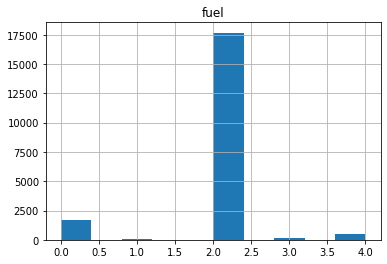

<Figure size 720x504 with 0 Axes>

In [0]:
#Histogram Visualization
import matplotlib.pyplot as plt
df.hist('fuel')
plt.figure(figsize=(10,7))
plt.show()

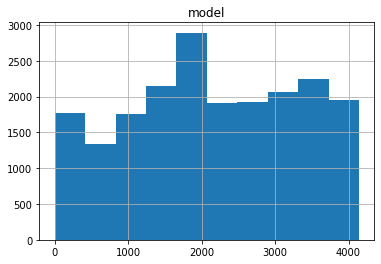

<Figure size 720x504 with 0 Axes>

In [0]:
#Histogram Visualization
import matplotlib.pyplot as plt
df.hist('model')
plt.figure(figsize=(10,7))
plt.show()

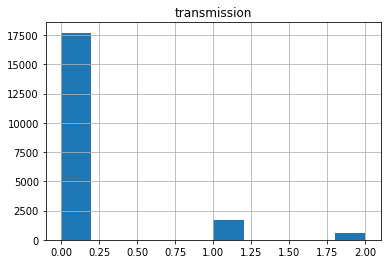

<Figure size 720x504 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
df.hist('transmission')
plt.figure(figsize=(10,7))
plt.show()

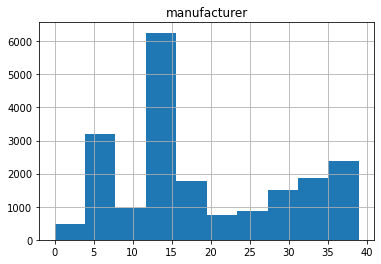

<Figure size 720x504 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
df.hist('manufacturer')
plt.figure(figsize=(10,7))
plt.show()

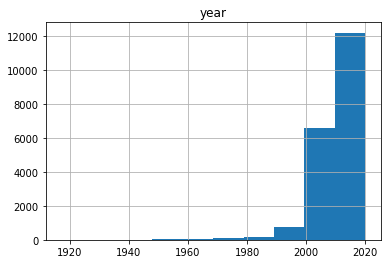

<Figure size 720x504 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
df.hist('year')
plt.figure(figsize=(10,7))
plt.show()

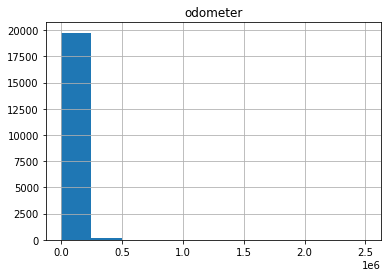

<Figure size 720x504 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
df.hist('odometer')
plt.figure(figsize=(10,7))
plt.show()

# **Matrix Correlation**

 betweens data that will be use to classification

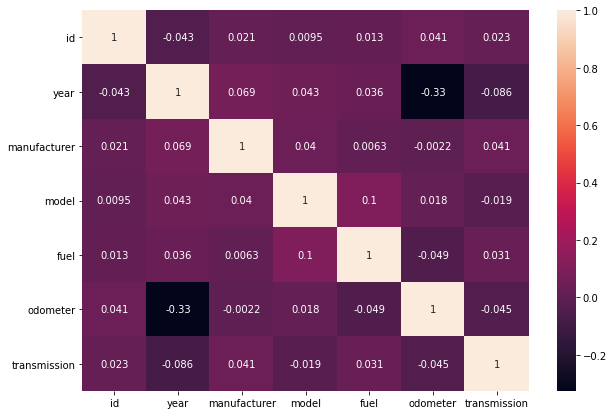

In [0]:
import seaborn as sn
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sn.heatmap(corrMatrix, annot=True)
plt.show()

# **DATA** **SPLITTING**
 Split the dataset into the **Train Data** and **Test Data**

in this phase, we split the data into training and test data for classification

In [0]:
# Set the X and y
X = feat_scale # training dataset
y = df.transmission #testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [0]:
testingdata = pd.DataFrame(data = y)
testingdata

,transmission
0,1
1,0
2,0
3,0
4,0
...,...
19996,0
19997,0
19998,0
19999,0


In [0]:
trainingdata = pd.DataFrame(data = X , columns=[ 'id','year','manufacturer','model','fuel','odometer'])
trainingdata

,id,year,manufacturer,model,fuel,odometer
0,0.105370,0.922330,0.974359,0.530292,0.5,0.025400
1,0.105304,0.961165,0.307692,0.425778,0.5,0.000004
2,0.105303,0.951456,0.333333,0.792904,0.5,0.003022
3,0.105301,0.961165,0.307692,0.425778,0.5,0.000004
4,0.103380,0.980583,0.307692,0.444847,0.0,0.028060
...,...,...,...,...,...,...
19996,0.940139,0.961165,0.820513,0.332851,0.0,0.017362
19997,0.940135,0.980583,0.743590,0.782525,0.5,0.013147
19998,0.939940,0.990291,0.487179,0.536809,0.5,0.007006
19999,0.939562,0.970874,0.948718,0.307989,0.5,0.012194


# **Classification**

Now all the step on data preprocessing is finish, the next phase is we do our **classification**

in this phase we do the classification using 3 classifier.
1. Naive Bayes (Gaussian)
2. KNN
3. Decision tree

1. **Naive Bayes**

the first classifier is Naive bayes

In [0]:
#using Gaussian Naive Bayes to predict the class
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_NB = gnb.predict(X_test)
#return the prediction
y_pred_NB

array([0, 0, 0, ..., 0, 0, 0])

2. **Decision Tree**

The second classifier is Decision Tree

In [0]:
#using the decision tree to predict the class
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(X_train,y_train)
y_pred_ID3 = model_dt.predict(X_test)
#return the prediction
y_pred_ID3

array([0, 0, 0, ..., 0, 0, 0])

3. **KNN**

The third classifier is K Nearest Neighbord (KNN

In [0]:
#using the knn to predict the class
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
#return the prediction
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

# **Accuracy**

in this phase we calculate the **Accuraccy, Confussion Matrix, Precision, Recall,F1-Score, Support** of every model. 

1. Naive Bayes

In [0]:
# print the Confusion Matrix, Acuracy Score, and Report (precision, recallm f1-score, support)
y_true = y_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix Naive Bayes Classifier :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix Naive Bayes Classifier :
[[5219  101    0]
 [ 443   62    0]
 [ 171    5    0]]
Accuracy Score : 0.8800199966672221
Report : 
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      5320
           1       0.37      0.12      0.18       505
           2       0.00      0.00      0.00       176

    accuracy                           0.88      6001
   macro avg       0.42      0.37      0.37      6001
weighted avg       0.82      0.88      0.85      6001



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. KNN

In [0]:
#print the Confusion Matrix, Acuracy Score, and Report (precision, recallm f1-score, support)
y_true = y_test
results = confusion_matrix(y_true, y_pred_knn) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_knn))
print('Report : ')
print(classification_report(y_true, y_pred_knn))

Confusion Matrix :
[[5162  133   25]
 [ 402  101    2]
 [ 158    9    9]]
Accuracy Score : 0.8785202466255624
Report : 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5320
           1       0.42      0.20      0.27       505
           2       0.25      0.05      0.08       176

    accuracy                           0.88      6001
   macro avg       0.52      0.41      0.43      6001
weighted avg       0.84      0.88      0.85      6001



3. ID3

In [0]:
# print the Confusion Matrix, Acuracy Score, and Report (precision, recallm f1-score, support)
y_true = y_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[4934  286  100]
 [ 275  222    8]
 [ 102   14   60]]
Accuracy Score : 0.8691884685885686
Report : 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5320
           1       0.43      0.44      0.43       505
           2       0.36      0.34      0.35       176

    accuracy                           0.87      6001
   macro avg       0.57      0.57      0.57      6001
weighted avg       0.87      0.87      0.87      6001



# **Comparison between Accuracy**

In this phase we **compare the acuracy** between model knn, decision tree and naive bayes.

In [0]:
result_class = pd.DataFrame({
    'True Predictions': y_true,
    'Naive Bayes': y_pred_NB,
    'KNN' : y_pred_knn,
    'Decision Tree' : y_pred_ID3
})

result_class

,True Predictions,Naive Bayes,KNN,Decision Tree
17570,0,0,0,0
15176,0,0,0,0
12413,0,0,0,0
3845,1,1,1,1
10952,0,0,0,0
...,...,...,...,...
19741,0,0,0,0
6748,0,0,0,0
15938,0,0,0,0
9700,0,0,0,0


**Print the result class**

note : the value of the class label (transmission column) is has 3 values (0, 1, 2)

In [0]:
result_class['Naive Bayes'].value_counts()

0    5833
1     168
Name: Naive Bayes, dtype: int64

In [0]:
result_class['KNN'].value_counts()

0    5722
1     243
2      36
Name: KNN, dtype: int64

In [0]:
result_class['Decision Tree'].value_counts()

0    5311
1     522
2     168
Name: Decision Tree, dtype: int64

In [0]:
result_class['True Predictions'].value_counts()

0    5320
1     505
2     176
Name: True Predictions, dtype: int64